# **Diamond Price Prediction**

# Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reading the Data

In [15]:
df = pd.read_csv('/content/diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Understanding the Data

In [16]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [17]:
df.shape

(53940, 10)

In [18]:
df.size

539400

In [19]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [21]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [22]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [23]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [24]:
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [25]:
from sklearn.preprocessing import LabelEncoder
labelencoding = LabelEncoder()
categories=['cut', 'color',	'clarity']
df[categories]=df[categories].apply(lambda x:labelencoding.fit_transform(x))
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


# Visualiztion

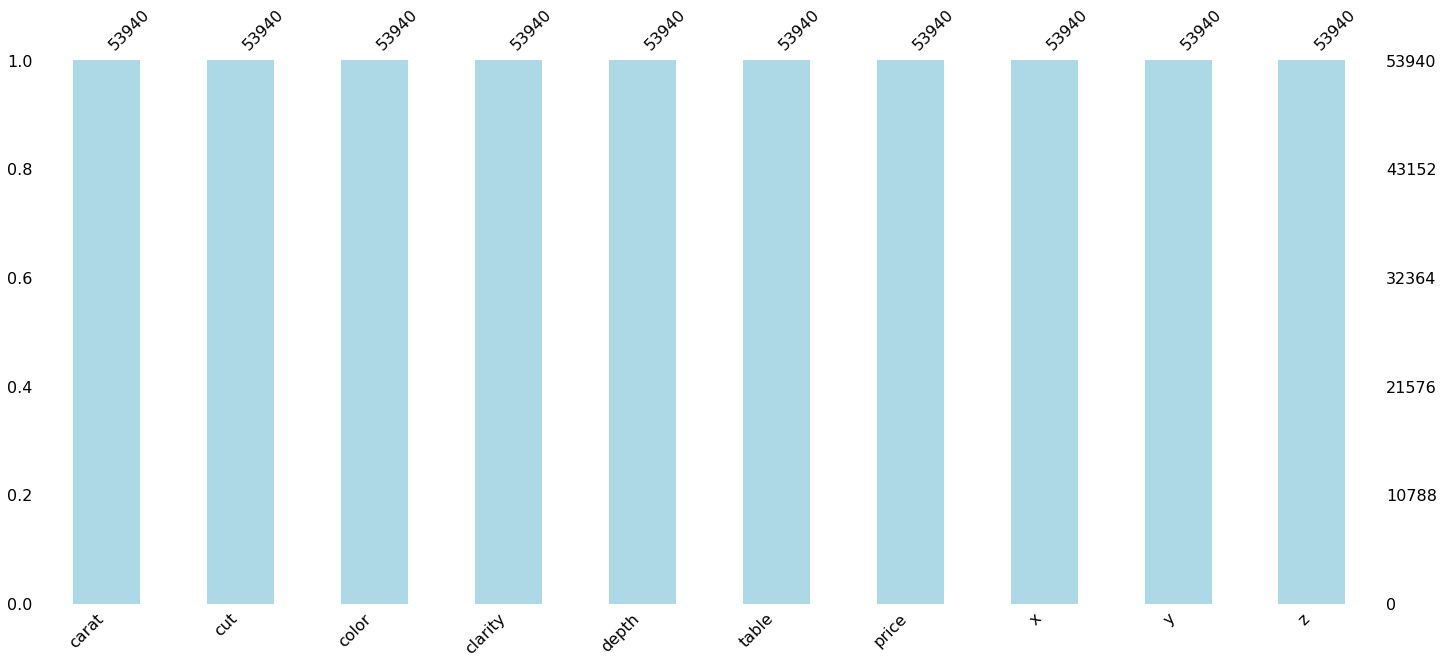

In [26]:
import missingno as no
no.bar(df, color='lightblue')

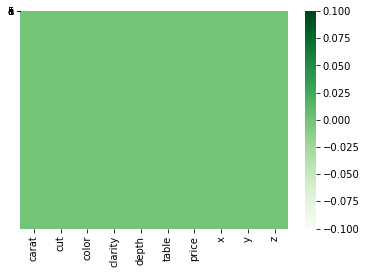

In [27]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='Greens')

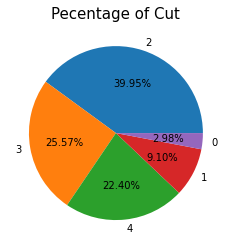

In [28]:
df1 = df['cut'].value_counts()
plt.pie(df1.values, labels=df1.index, autopct='%0.2f%%')
plt.title('Pecentage of Cut', fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


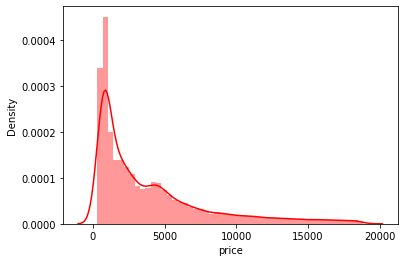

In [29]:
sns.distplot(df['price'], color='red')

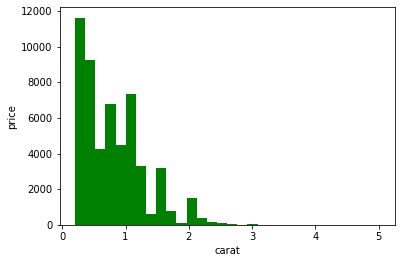

In [30]:
plt.hist(df['carat'],bins = 30, color='g')
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

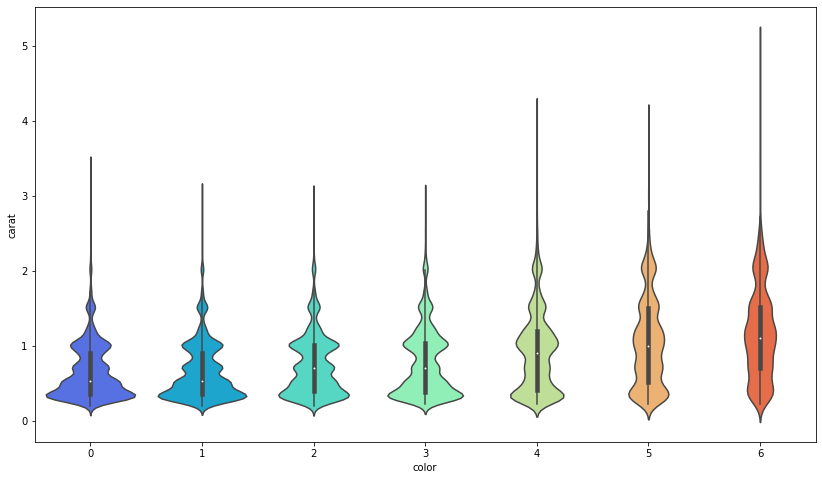

In [31]:
plt.figure(figsize=(14,8))
sns.violinplot(x=df.color, y=df.carat, palette='rainbow')

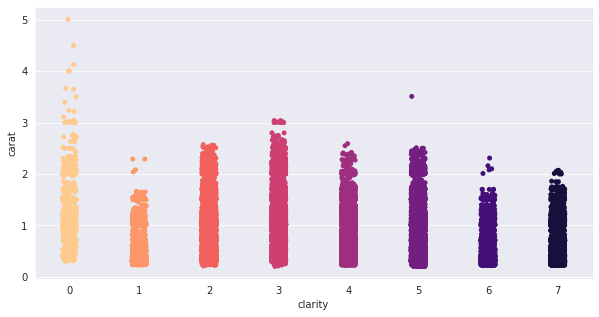

In [72]:
plt.figure(figsize=(10,5))
sns.stripplot(x=df.clarity, y=df.carat, palette='magma_r')
plt.show()

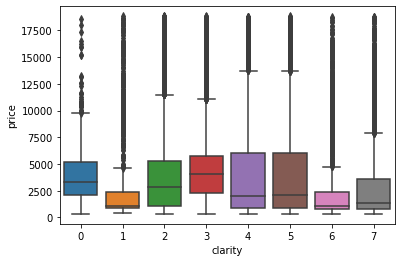

In [33]:
sns.boxplot(x='clarity',y='price',data=df)
plt.show()

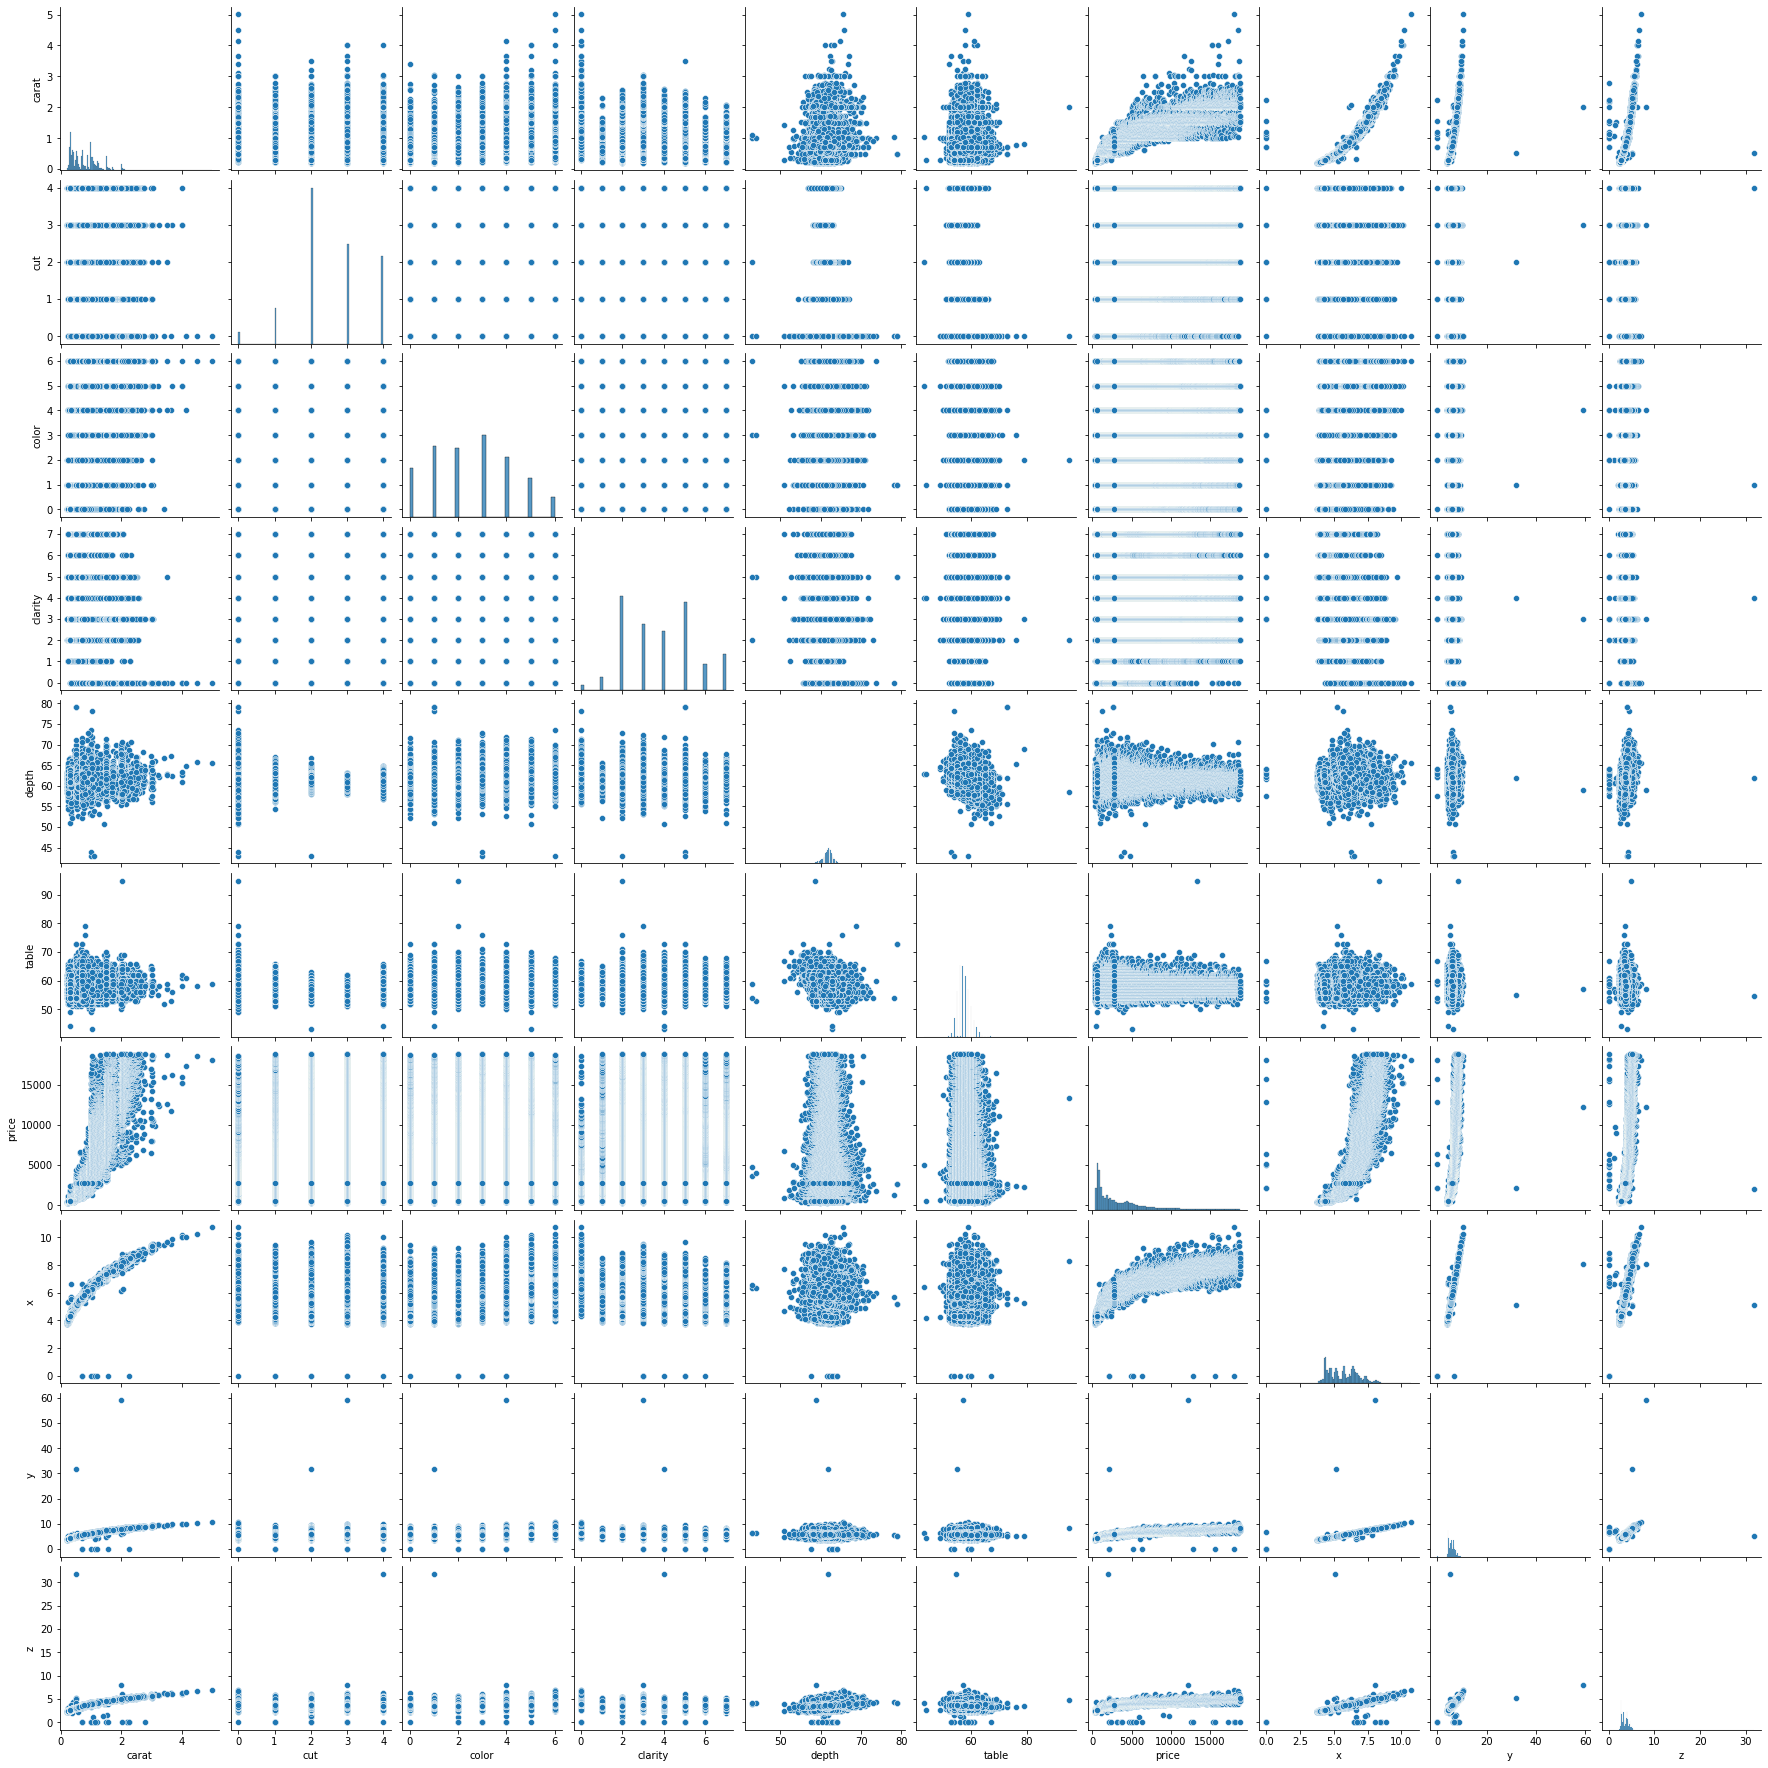

In [34]:
sns.pairplot(df)

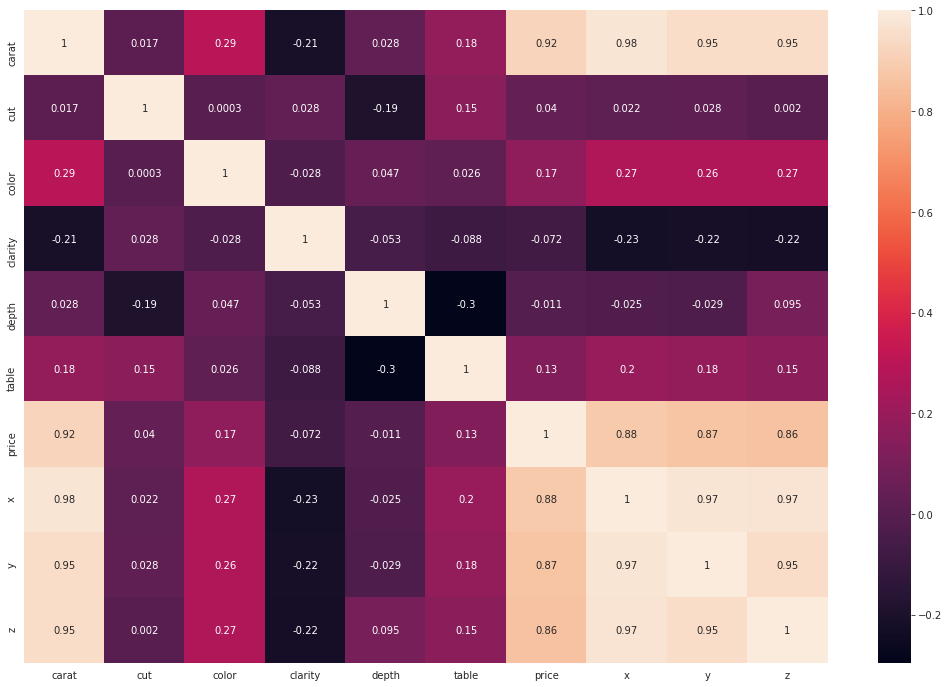

In [64]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), yticklabels='auto', annot=True)
plt.show()

# Splitting the Data into Dependent and Independent Variables

In [196]:
x = df.drop(['cut', 'color',	'clarity', 'price'], axis=1)
y = df["price"]

In [197]:
x.shape

(53940, 6)

# Feature Importance

In [198]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

[0.39559482 0.02450744 0.0182395  0.34262759 0.11484015 0.1041905 ]


In [199]:
feat_imp = pd.Series(model.feature_importances_, index=x.columns)

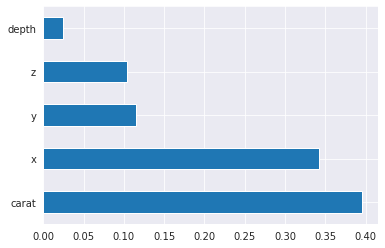

In [200]:
feat_imp.nlargest(5).plot(kind='barh')

# Training and Testing the Data

In [229]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=23)

# Linear Regression

In [230]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Prediction

In [231]:
ypred_train = lr.predict(xtrain)
ypred_test = lr.predict(xtest)

## Accuracy

In [232]:
from sklearn import metrics
print("Accuracy of training data:", metrics.r2_score(ytrain, ypred_train)*100)
ac1 = metrics.r2_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 86.03402181161945
Accuracy of testing data: 85.5896797526322


## Error

In [233]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, ypred_test)
print("Mean Square Error:", mse)

Mean Square Error: 2264310.330400049


In [234]:
p=lr.predict([[0.23, 61.5,	55.0,	3.95,	3.98,	2.43]])
p

array([329.39140186])

# Saving the Model

In [236]:
import pickle 
pickle.dump(lr, open('model.pkl', 'wb'))